In [27]:
import matplotlib.pyplot as plt # plotting library
import matplotlib.gridspec as gridspec # organizing plots in a grid
import numpy as np # numeric array manipulation
import pandas as pd # dataframe structure

from scipy.integrate import solve_ivp # function to obtain trajectories from ODEs
from scipy.optimize import root

import ipywidgets as widgets # Widgets for parameter exploration
from IPython.display import display

## Example XX. 2D genetic oscillator

The following code integrates the 2-component oscillator discussed in the paper. The limit cycle attracts trajectories from different initial conditions, resulting in systained oscillations. Tuning the parameter one can observe how the limit cycle attractor appears and disappears, resulting in a stable steady-state fixed point of gene expression:

In [2]:
from IPython.display import IFrame

#iframe = '<img src="https://drive.google.com/open?id=12bljTFSTE4aM2zyPDNSJ4eDNvbB_Hcgo&usp=drive_fs">'

iframe = 'https://drive.google.com/file/d/12bljTFSTE4aM2zyPDNSJ4eDNvbB_Hcgo/preview'
IFrame(iframe,800,300)

In [28]:
def BS1D_ODE(t,x, params): 
  """
  Evaluates the r.h.s of the ODEs describing a 1D bistable switch
  """
  globals().update(params) ## unpacks parameters so they can be accessed by their name, careful when parallelizing this code
  flow = beta + sigma*(x/k)**n/(1+(x/k)**n) - ga*x
  return flow

def find_ss(params):
  """
  Find the steady state of the oscillator system
  """
  globals().update(params) ## unpacks parameters so they can be accessed by their name, careful when parallelizing this code
  
  rangeX = np.linspace(0,beta*sigma/ga,1000) 
  flowX = BS1D_ODE(0,rangeX,params)
  zero_flux_ids = rangeX[np.where(flowX[0:-1]*flowX[1:]<=0)]
  print('z',zero_flux_ids)
  ss = [root(
          lambda x: BS1D_ODE(0,x,params),
          initial_x).x[0] for initial_x in zero_flux_ids]
  
  return ss

def plot_trajectories(**params):
  globals().update(params)
  """
    Plot trajectories
  """  
  # Generating grid and layout for the subplots
  ss_list = find_ss(params)
  initial_conditions = [0.2,1.2,2.3,3,3.9]
  num_time_steps = 1000 # time steps to integrate and find cycle
  t = np.linspace(0, 5/ga, num_time_steps)
  for initial_condition in initial_conditions:
    sol = solve_ivp(BS1D_ODE, [t[0],t[-1]], [initial_condition], args=(params,),t_eval=t)
    plt.plot(t,sol.y[0,:])
  
  
  for ss in find_ss(params): # for every steady state
    dx = 1E-5 # small increment to calculate derivative
    if (BS1D_ODE(0,ss+dx,params)-BS1D_ODE(0,ss,params))<0: #stable state
      plt.plot(t,np.ones_like(t)*ss,':',color = "black")
    else: # unstable state
      plt.plot(t,np.ones_like(t)*ss,':',color = "grey")
      
      
  plt.xlabel('time')
  plt.ylabel('X')
  plt.savefig("trajectories.pdf")  
  plt.show()

  
  
  plt.show()

def plot_dxdt(**params):
  globals().update(params)
  """
    Plot change of the rate dx/dt as a function of X
  """  
  # Generating grid and layout for the subplots
  x = np.linspace(0,beta*sigma/ga,1000)
  dxdt = BS1D_ODE(0,x,params)
  
  plt.plot(x,dxdt)  
  plt.xlabel('X')
  plt.ylabel('dX/dt')
  
  plt.savefig("derivative.pdf")
  plt.show()
  
def plot_bifurcationcurve(params):
  """
  Using beta as the control parameter, find the bifurcation curve (x*,beta)
  Since for this system the curve beta(x*) is monotonic, we can simplify the complexity 
  of the problem by doing the search of beta(x^*) and then inverting the axes
  """
  globals().update(params) ## unpacks parameters so they can be accessed by their name, careful when parallelizing this code
  
  Xvalues = np.linspace(0,3.7)
  beta_values = -BS1D_ODE(0,Xvalues,params)+beta
  plt.plot(beta_values,Xvalues)
  plt.xlabel('beta')
  plt.ylabel('X')
  plt.savefig("bifurcation_1D.pdf")
  plt.show()
  





z [0.76876877 1.32612613 3.13273273]
steady states [0.7776961126503242, 1.3403456855759777, 3.145775241901227]


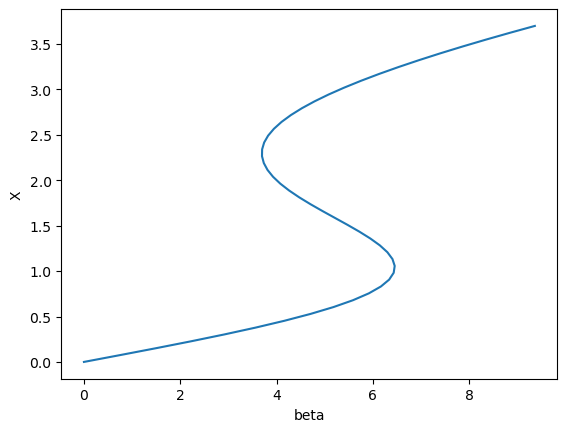

In [153]:
params = {
"beta":6,
"sigma":32.0,
"n":3,
"k":2,
"ga":10.0}
ss_list = find_ss(params)
print("steady states", ss_list)
plot_bifurcationcurve(params)






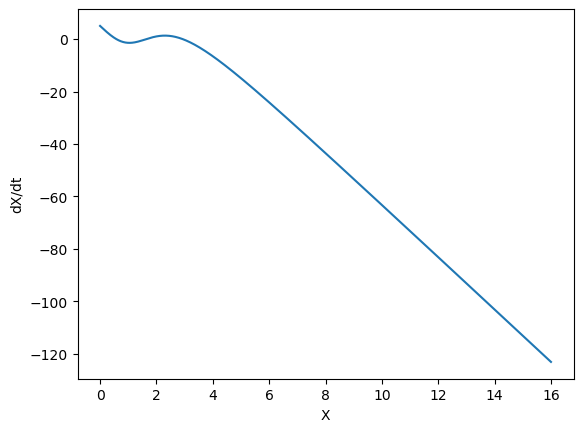

In [ ]:
def signal 

z [0.42282282 1.9987988  2.58818819]
steady states [0.43190631894451237, 1.9999999999999882, 2.595418947796178]


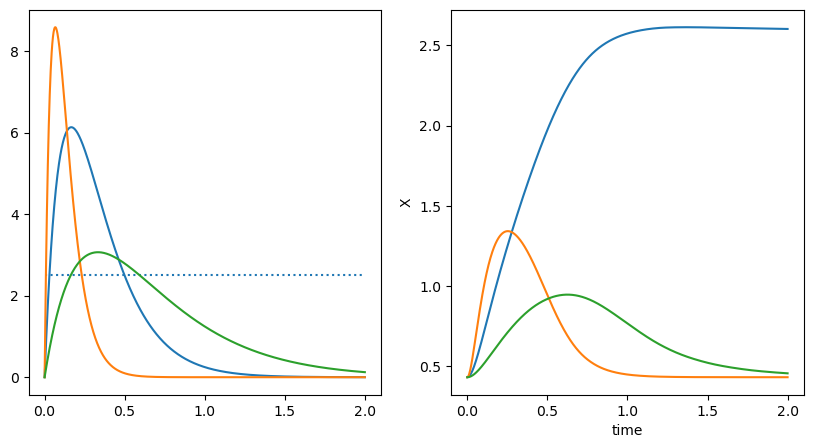

In [87]:
def transient_signal(t,SA,Sk):
    
    return t*SA*np.exp(-Sk*t)

def BS1D_ODE_transient(t,x, params): 
  """
  Evaluates the r.h.s of the ODEs describing a 1D bistable switch
  """
  globals().update(params) ## unpacks parameters so they can be accessed by their name, careful when parallelizing this code
  flow = beta + transient_signal(t,SA,Sk) + sigma*(x/k)**n/(1+(x/k)**n) - ga*x
  return flow


def plot_trajectories_transient(**params):
  color_list = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green
  globals().update(params)
  """
    Plot trajectories
  """  
  # Generating grid and layout for the subplots
  ss_list = find_ss(params)
  print("steady states", ss_list)
  num_time_steps = 1000 # time steps to integrate
  conditions_dictlist = [{"SA":100,"Sk":6},{"SA":350,"Sk":15},{"SA":25,"Sk":3}]
  t = np.linspace(0, 20/ga, num_time_steps)
  initial_condition = ss_list[0]
  fig = plt.figure(figsize=(10, 5))  # Landscape aspect ratio (width > height)
  gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # 2 rows, 1 column
  ax1 = fig.add_subplot(gs[0, 0])
  ax2 = fig.add_subplot(gs[0, 1])
  ax1.plot(t,np.ones_like(t)*2.5,':')
  for icon,conditions in enumerate(conditions_dictlist):
      params.update(conditions)
      sol = solve_ivp(BS1D_ODE_transient, [t[0],t[-1]], [initial_condition], args=(params,),t_eval=t)
      ax1.plot(t,transient_signal(t,params["SA"],params["Sk"]),color_list[icon])
      ax2.plot(t,sol.y[0,:],color_list[icon])
      
  
  
      
  plt.xlabel('time')
  plt.ylabel('X')
  plt.savefig("trajectories.pdf")  
  plt.show()


params = {
"beta":4,
"sigma":32.0,
"n":3,
"k":2,
"ga":10.0,
"Sk": 1,
"SA": 10}

plot_trajectories_transient(**params)

In [ ]:

def plot_stochastic_trajectories(**params):
  globals().update(params)
  """
    Plot trajectories
  """  
  # Generating grid and layout for the subplots
  ss_list = find_ss(params)
  num_time_steps = 1000 # time steps to integrate and find cycle
  x = 0.43
  t = 0
  x_traj = []
  t_traj = []
  dt = 0.01/ga
  tfinal = 400/ga
  steps = int(tfinal//dt)
  for step in range(steps):
    x = x + BS1D_ODE(t,x,params)*dt+np.random.normal()*noise_int*np.sqrt(dt)
    x = np.abs(x) # reflective boundary conditions
    t = t + dt
    if step%10 == 0:
      x_traj.append(x)
      t_traj.append(t)
      
  plt.plot(t_traj,x_traj)
  plt.s
  plt.show()
  


z [0.56056056 1.63363363 2.91491491]
steady states [0.5738405280936834, 1.6479147578286675, 2.9245834390417027]
z [0.56056056 1.63363363 2.91491491]


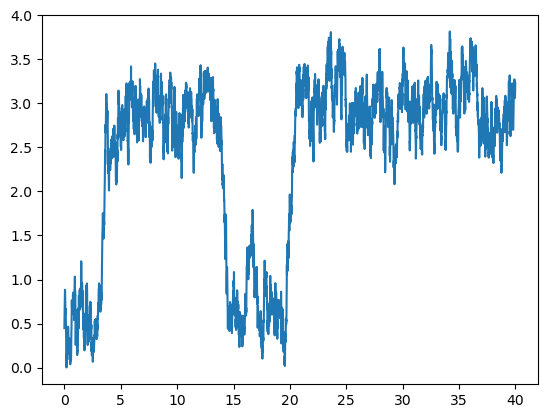

In [216]:

params = {
"beta":5,
"sigma":32.0,
"n":3,
"k":2,
"ga":10.0,
"noise_int":1.0}
ss_list = find_ss(params)
print("steady states", ss_list)
plot_stochastic_trajectories(**params)

In [95]:
13//7

1